# Lecture 8 - PyTorch

This will be the final lecture, today we will first have a brief introduction of deep learning, then we will look at some basics of using PyTorch to implement some simple models in deep learning.



## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

## Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are 
1. Use the GPU to speed up computation 
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [1]:
import torch
import numpy as np

The equivalent object to numpy arrays in pytorch are called tensors, but they are just multidimensional arrays.

In [2]:
torch.tensor([2,3,4,5])

tensor([2, 3, 4, 5])

In [3]:
torch.zeros((5,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [4]:
x = torch.ones((5,5))
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [5]:
2*x + 5

tensor([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]])

In [6]:
torch.randn(5,5)

tensor([[ 0.7830,  0.9593, -0.2359,  0.4936,  0.0778],
        [ 1.0929, -1.0337,  1.0417, -1.7634, -1.4706],
        [ 1.2544,  0.2573, -2.4773,  1.8643, -0.5207],
        [-1.3669, -2.0585, -0.0264, -0.0815,  0.9751],
        [ 1.9430,  0.4384,  0.6319, -0.0972, -0.1088]])

In [7]:
x = torch.rand(25)
x

tensor([0.1033, 0.1029, 0.6337, 0.1929, 0.9842, 0.8687, 0.9632, 0.3511, 0.2352,
        0.1184, 0.7772, 0.8484, 0.2764, 0.7023, 0.2222, 0.9153, 0.1310, 0.0264,
        0.7618, 0.5968, 0.7481, 0.8909, 0.6718, 0.6993, 0.6627])

In [8]:
x=x.reshape(-1,5)
x

tensor([[0.1033, 0.1029, 0.6337, 0.1929, 0.9842],
        [0.8687, 0.9632, 0.3511, 0.2352, 0.1184],
        [0.7772, 0.8484, 0.2764, 0.7023, 0.2222],
        [0.9153, 0.1310, 0.0264, 0.7618, 0.5968],
        [0.7481, 0.8909, 0.6718, 0.6993, 0.6627]])

In [9]:
x.shape

torch.Size([5, 5])

In [10]:
print(torch.arange(10))
print(torch.eye(5))
print(torch.linspace(0,1,10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])


Some functions are a bit different

In [11]:
A = torch.rand(5,5)
#or A = torch.rand((5,5))
x = torch.ones(5,1)
#x = torch.rand((5,1))
A@x

tensor([[2.3641],
        [2.4643],
        [2.3872],
        [2.5754],
        [3.6095]])

In [12]:
A = np.random.rand(5,5)
x = np.ones((5,1))
A@x

array([[2.95544384],
       [1.89199807],
       [2.52855408],
       [1.68813529],
       [1.83368933]])

You can convert tensors to a numpy array that shares its memory with the pytorch tensor

In [13]:
x = torch.ones(5,5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [14]:
xn = x.numpy()
xn

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [15]:
xn[4,2]=10
xn

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., 10.,  1.,  1.]], dtype=float32)

In [16]:
x

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 10.,  1.,  1.]])

### Using the GPU

The GPU (Graphical Processing Unit) is a separate processing unit that is specialized to handle bulk computations required for rendering high quality graphics. It mainly consists of a large number of processor cores that are individually very slow, but because of their sheer number (around 2000) they can churn through computations very quickly. 

In [17]:
import torch
torch.cuda.is_available()

True

Installing the GPU drivers and the CUDA toolkit can be quite messy, so if you just want to experiment with GPUs and deep learning libraries, you can use [Google colaboratory](https://colab.research.google.com/)

In [18]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [19]:
A = torch.rand(100,100)
B = torch.rand(100,100)

In [20]:
A@B

tensor([[27.1041, 25.2938, 26.8609,  ..., 25.0024, 23.8091, 24.1602],
        [24.5708, 23.0154, 24.2739,  ..., 25.5133, 21.8137, 20.8682],
        [22.9653, 22.5256, 22.1308,  ..., 22.3759, 20.5783, 20.5542],
        ...,
        [27.7837, 24.3346, 27.2057,  ..., 25.6568, 23.2054, 23.6772],
        [26.3410, 24.2153, 26.9384,  ..., 24.6268, 23.2034, 23.4321],
        [29.0729, 25.9696, 25.7757,  ..., 24.6073, 24.7581, 25.5841]])

In [21]:
A_gpu = A.to(gpu)
B_gpu = B.to(gpu)

In [22]:
A_gpu@B_gpu

tensor([[27.1041, 25.2938, 26.8609,  ..., 25.0024, 23.8091, 24.1602],
        [24.5708, 23.0154, 24.2739,  ..., 25.5133, 21.8137, 20.8682],
        [22.9653, 22.5256, 22.1308,  ..., 22.3759, 20.5783, 20.5542],
        ...,
        [27.7837, 24.3346, 27.2057,  ..., 25.6568, 23.2054, 23.6772],
        [26.3410, 24.2153, 26.9384,  ..., 24.6268, 23.2034, 23.4321],
        [29.0729, 25.9696, 25.7757,  ..., 24.6073, 24.7581, 25.5841]],
       device='cuda:0')

In [23]:
#A@B_gpu #this won't work!

In [24]:
C_gpu = A_gpu@B_gpu
C = C_gpu.to(cpu)
C

tensor([[27.1041, 25.2938, 26.8609,  ..., 25.0024, 23.8091, 24.1602],
        [24.5708, 23.0154, 24.2739,  ..., 25.5133, 21.8137, 20.8682],
        [22.9653, 22.5256, 22.1308,  ..., 22.3759, 20.5783, 20.5542],
        ...,
        [27.7837, 24.3346, 27.2057,  ..., 25.6568, 23.2054, 23.6772],
        [26.3410, 24.2153, 26.9384,  ..., 24.6268, 23.2034, 23.4321],
        [29.0729, 25.9696, 25.7757,  ..., 24.6073, 24.7581, 25.5841]])

### GPU - CPU memory transfer

In [25]:
big_mat = torch.rand(20000,20000);

In [26]:
big_mat_gpu = big_mat.to(gpu)

In [27]:
big_mat= big_mat_gpu.to(cpu)

In [28]:
del big_mat_gpu
torch.cuda.empty_cache()

In [29]:
del big_mat

## Speedup from GPU

In [30]:
%%timeit
A = torch.rand(3000,3000)
B = torch.rand(3000,3000)
C = torch.zeros(3000,3000)
C.copy_(B)
for i in range(5):
    C=torch.mm(A,C)

1 loop, best of 3: 3.48 s per loop


In [31]:
%%timeit
A = torch.rand(3000,3000, device = gpu)
B = torch.rand(3000,3000, device = gpu)
C = torch.zeros(3000,3000, device = gpu)
C.copy_(B)
for i in range(5):
    C=torch.mm(A,C)

100 loops, best of 3: 66.5 ms per loop


## Automatic Differentiation

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [32]:
x = torch.tensor([2.0])
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [33]:
y = m*x + c
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [34]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<NormBackward0>)

In [35]:
m.grad

Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [36]:
loss.backward()

In [37]:
m.grad

tensor([-2.])

In [38]:
c.grad

tensor([-1.])

In [39]:
with torch.no_grad():
    m -= 0.01 * m.grad
    c -= 0.3 * c.grad

In [40]:
m,c

(tensor([5.0200], requires_grad=True), tensor([2.3000], requires_grad=True))

In [41]:
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [42]:
m.grad.zero_()
c.grad.zero_()

m.grad, c.grad

(tensor([0.]), tensor([0.]))

In [43]:
y = m*x + c

In [44]:
y

tensor([12.3400], grad_fn=<AddBackward0>)

In [45]:
loss = torch.norm( y - 13)
loss

tensor(0.6600, grad_fn=<NormBackward0>)

In [46]:
loss.backward()
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

### Making it more compact

In [47]:
def model_fn(x,m,c):
    return m*x + c

In [48]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [49]:
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [50]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [51]:
y = model_fn(x,m,c)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    m -= 0.05 * m.grad
    c -= 0.05 * c.grad
m.grad.zero_()
c.grad.zero_()

print( f" m = {m}\n c = {c}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous m,c values

 m = tensor([5.1000], requires_grad=True)
 c = tensor([2.0500], requires_grad=True)
 y = tensor([12.], grad_fn=<AddBackward0>)
 loss = 1.0


### Slightly more complicated problem

In [52]:
import matplotlib.pyplot as plt

In [53]:
def model_fn(x,m,c):
    return m@x + c

In [54]:
def loss_fn(y,yt):
    return torch.norm(y-yt)

In [55]:
m = torch.rand((5,5), requires_grad = True)
c = torch.ones((5,1), requires_grad = True)

In [56]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

loss = 42.38534927368164
loss = 38.17620849609375
loss = 34.29269790649414
loss = 30.80988311767578
loss = 27.806318283081055
loss = 25.347286224365234
loss = 23.459623336791992
loss = 22.111276626586914
loss = 21.21372413635254
loss = 20.65054702758789
loss = 20.311750411987305
loss = 20.113027572631836
loss = 19.997844696044922
loss = 19.931276321411133
loss = 19.892711639404297
loss = 19.87023162841797
loss = 19.857017517089844
loss = 19.84918212890625
loss = 19.844486236572266
loss = 19.84164810180664
loss = 19.839906692504883
loss = 19.83884048461914
loss = 19.838171005249023
loss = 19.837749481201172
loss = 19.837478637695312
loss = 19.837305068969727
loss = 19.837194442749023
loss = 19.837121963500977
loss = 19.83708381652832
loss = 19.837047576904297
loss = 19.8370304107666
loss = 19.837003707885742
loss = 19.836997985839844
loss = 19.836997985839844
loss = 19.836990356445312
loss = 19.836994171142578
loss = 19.83698844909668
loss = 19.836978912353516
loss = 19.83698081970215
l

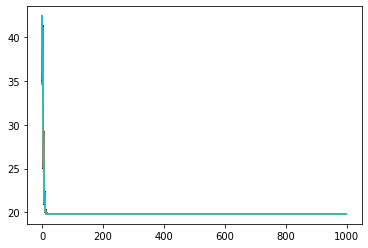

In [57]:
for i in range(1000):
  y = model_fn(x,m,c)
  loss = loss_fn(y,yt)
  loss.backward()
  with torch.no_grad():
      m -= 0.05 * m.grad
      c -= 0.05 * c.grad
  m.grad.zero_()
  c.grad.zero_()

  losses+=[loss.item()]
  print( f"loss = {loss}")
  plt.plot(losses);

## Using Library functions

In [58]:
model = torch.nn.Sequential(
    torch.nn.Linear(5, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 5),
)

In [59]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2015, -0.0019,  0.1120,  0.2395,  0.3313],
         [-0.3845,  0.0647,  0.4271, -0.3099, -0.3790],
         [ 0.2565, -0.2288,  0.0125,  0.1229,  0.3511],
         [ 0.4114, -0.2861, -0.2163, -0.3494, -0.1167],
         [ 0.0591, -0.0966,  0.3480, -0.4339,  0.2837]], requires_grad=True),
 Parameter containing:
 tensor([-0.2166, -0.3842,  0.3608, -0.2220, -0.0256], requires_grad=True),
 Parameter containing:
 tensor([[-0.2141, -0.3050,  0.3272, -0.2630,  0.1940],
         [ 0.1967, -0.1314,  0.2131,  0.2222, -0.4365],
         [ 0.1327,  0.3509, -0.2620, -0.1779,  0.4354],
         [ 0.3408, -0.3275, -0.3850,  0.3163,  0.1366],
         [ 0.3936, -0.3701,  0.2420, -0.3317, -0.3789]], requires_grad=True),
 Parameter containing:
 tensor([-0.3465, -0.1438, -0.1364,  0.0673, -0.3204], requires_grad=True)]

In [60]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [61]:
x = torch.randn(100,5)
yt = torch.randn(100,1)
losses = []

Using the optim package

In [62]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss = 361.1955261230469
loss = 361.193115234375
loss = 361.34375
loss = 361.29290771484375
loss = 361.2300109863281
loss = 361.0579528808594
loss = 360.98248291015625
loss = 361.22344970703125
loss = 361.0437927246094
loss = 360.92767333984375
loss = 360.9052429199219
loss = 361.1134033203125
loss = 360.99822998046875
loss = 360.8470153808594
loss = 361.00787353515625
loss = 361.0845947265625
loss = 360.9836120605469
loss = 360.92852783203125
loss = 360.7809143066406
loss = 360.8907165527344
loss = 360.9651794433594
loss = 361.0726318359375
loss = 360.9137878417969
loss = 360.9417419433594
loss = 361.02044677734375
loss = 361.0154113769531
loss = 361.036376953125
loss = 361.0166015625
loss = 360.92877197265625
loss = 360.7730407714844
loss = 360.94561767578125
loss = 360.77728271484375
loss = 360.8296813964844
loss = 360.8792419433594
loss = 360.99737548828125
loss = 360.9036865234375
loss = 360.7848815917969
loss = 360.709228515625
loss = 360.7812194824219
loss = 360.8575134277344
lo

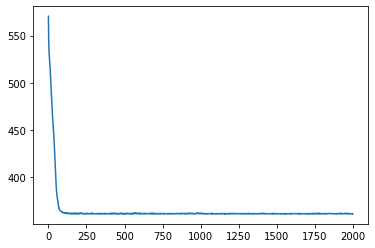

In [65]:
for i in range(1000):
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
plt.plot(losses);

## MNIST Example

In [66]:
from torchvision.datasets import MNIST

In [67]:
data = MNIST(".",download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [68]:
len(data)

60000

In [69]:
import numpy as np
img,y = data[np.random.randint(1,60000)]
print(y)
img

6


In [70]:
data.train_data[2].shape

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([28, 28])

In [71]:
data.train_labels[2]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(4)

### MNIST Training

In [72]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
)

In [73]:
loss_fn = torch.nn.CrossEntropyLoss()

In [74]:
sample = np.random.choice(range(len(data.train_data)),1000)
x = data.train_data[sample].reshape(1000,-1).float()/255
yt = data.train_labels[sample]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [75]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [76]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


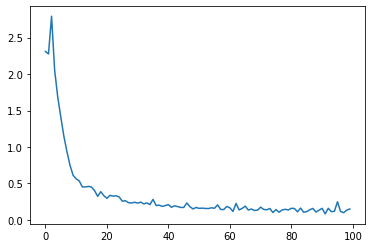

In [77]:
for i in range(100):
    
    sample = np.random.choice(range(len(data.train_data)),1000)
    x = data.train_data[sample].reshape(1000,-1).float()/255
    yt = data.train_labels[sample]
    
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    #print( f"loss = {loss}")
plt.plot(losses);

In [78]:
x_test = data.train_data[-1000:].reshape(1000,-1).float()/255
y_test = data.train_labels[-1000:]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [79]:
with torch.no_grad():
    y_pred = model(x_test)

In [80]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.98


## Course Conclusion

By now you should have a sufficient introduction to the various ways one can use python for scientific computing. The best way to learn more is to start using python for whatever project you are working on. Only practice will make you comfortable with using python.
